In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.path

In [2]:
# Define Patches for each of the 9 regions
Basins = []
Basins.append('Polar N. Atlantic')
Basins.append('Subtropical N. Atlantic')
Basins.append('Eq. Atlantic')
Basins.append('S. Atlantic')
Basins.append('Indian')
Basins.append('S. Pacific')
Basins.append('Eq. Pacific')
Basins.append('N. Pacific')
Basins.append('Southern Ocean')

IndLonsPts=[25, 25, 40,100, 100, 110,145,145,25];
IndLatsPts=[-90, 28, 30, 30, 0, -10,-10,-90,-90];

PacLonsPts=[145-0.1, 145-0.1, 110-0.1,100-0.1, 100-0.1, 260,260,300,300, 145];
PacLatsPts=[-90, -10, -10, 0, 66, 66,20,0,-90,-90];

transitionlats=[-40, -30, -15, -5, 5, 15, 35, 45];

# ACCESS Mask

In [3]:
ACCESS_grid_info = xr.open_mfdataset('/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/volcello/gn/v20191108/volcello_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-185912.nc')

In [4]:
ACCESS_lat = ACCESS_grid_info.latitude.values
ACCESS_lon = ACCESS_grid_info.longitude.values
ACCESS_depth = ACCESS_grid_info.lev.values
ACCESS_land_mask = ACCESS_grid_info.volcello.isel(time=0,lev=0)/ACCESS_grid_info.volcello.isel(time=0,lev=0)

In [5]:
x_pixel_nos = PacLonsPts
y_pixel_nos = PacLatsPts

temp_list = []
for a, b in zip(x_pixel_nos, y_pixel_nos):
    temp_list.append([a, b])

polygon = np.array(temp_list)
left = np.min(polygon, axis=0)
right = np.max(polygon, axis=0)
x = np.arange(math.ceil(left[0]), math.floor(right[0])+1)
y = np.arange(math.ceil(left[1]), math.floor(right[1])+1)
xv, yv = ACCESS_lon, ACCESS_lat
points = np.hstack((xv.reshape((-1,1)), yv.reshape((-1,1))))
path = matplotlib.path.Path(polygon)
mask_Pac = path.contains_points(points)
mask_Pac.shape = xv.shape
mask_Pac_bit = mask_Pac*np.ones_like(xv)

x_pixel_nos = IndLonsPts
y_pixel_nos = IndLatsPts

temp_list = []
for a, b in zip(x_pixel_nos, y_pixel_nos):
    temp_list.append([a, b])

polygon = np.array(temp_list)
left = np.min(polygon, axis=0)
right = np.max(polygon, axis=0)
x = np.arange(math.ceil(left[0]), math.floor(right[0])+1)
y = np.arange(math.ceil(left[1]), math.floor(right[1])+1)
xv, yv = ACCESS_lon, ACCESS_lat
points = np.hstack((xv.reshape((-1,1)), yv.reshape((-1,1))))
path = matplotlib.path.Path(polygon)
mask_Ind = path.contains_points(points)
mask_Ind.shape = xv.shape
mask_Ind_bit = mask_Ind*np.ones_like(xv)

combi_Ind_Pac_mask = np.array(mask_Ind) | np.array(mask_Pac) 
mask_Atl = ~combi_Ind_Pac_mask
mask_Atl_bit = mask_Atl*np.ones_like(xv)



In [6]:
mask_Polar_Atl = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Atl_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Atl_bit,0)
mask_TN_Atl = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Atl_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Atl_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_Eq_Atl = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Atl_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Atl_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SAtl = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Atl_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Atl_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)
mask_SO_Atl =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Atl_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Atl_bit,0)

In [7]:
mask_Polar_Pac = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Pac_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Pac_bit,0)
mask_TN_Pac = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Pac_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Pac_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_NPac = mask_Polar_Pac+mask_TN_Pac

mask_Eq_Pac = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Pac_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Pac_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SPac = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Pac_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Pac_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)
mask_SO_Pac =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Pac_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Pac_bit,0)

In [8]:
mask_Polar_Ind = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Ind_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Ind_bit,0)
mask_TN_Ind = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Ind_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Ind_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_Eq_Ind = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Ind_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Ind_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SInd = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Ind_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Ind_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)

mask_Ind = mask_Polar_Ind+mask_TN_Ind+mask_Eq_Ind+mask_SInd

mask_SO_Ind =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Ind_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Ind_bit,0)

mask_SO = mask_SO_Ind+mask_SO_Pac+mask_SO_Atl

In [9]:
mask_Polar_Atl_3D = np.repeat(mask_Polar_Atl[np.newaxis,:,:], ACCESS_depth.size, axis=0)
mask_TN_Atl_3D = np.repeat(mask_TN_Atl[np.newaxis,:,:], ACCESS_depth.size, axis=0)
mask_Eq_Atl_3D = np.repeat(mask_Eq_Atl[np.newaxis,:,:], ACCESS_depth.size, axis=0)
mask_SAtl_3D = np.repeat(mask_SAtl[np.newaxis,:,:], ACCESS_depth.size, axis=0)
mask_Ind_3D = np.repeat(mask_Ind[np.newaxis,:,:], ACCESS_depth.size, axis=0)
mask_NPac_3D = np.repeat(mask_NPac[np.newaxis,:,:], ACCESS_depth.size, axis=0)
mask_Eq_Pac_3D = np.repeat(mask_Eq_Pac[np.newaxis,:,:], ACCESS_depth.size, axis=0)
mask_SPac_3D = np.repeat(mask_SPac[np.newaxis,:,:], ACCESS_depth.size, axis=0)
mask_SO_3D = np.repeat(mask_SO[np.newaxis,:,:], ACCESS_depth.size, axis=0)

In [10]:
mask_ACCESS = np.zeros((np.array(Basins).size,mask_Polar_Atl_3D.shape[0],mask_Polar_Atl_3D.shape[1],mask_Polar_Atl_3D.shape[2]))
mask_ACCESS[0,:,:,:] = mask_Polar_Atl_3D
mask_ACCESS[1,:,:,:] = mask_TN_Atl_3D
mask_ACCESS[2,:,:,:] = mask_Eq_Atl_3D
mask_ACCESS[3,:,:,:] = mask_SAtl_3D
mask_ACCESS[4,:,:,:] = mask_Ind_3D
mask_ACCESS[5,:,:,:] = mask_SPac_3D
mask_ACCESS[6,:,:,:] = mask_Eq_Pac_3D
mask_ACCESS[7,:,:,:] = mask_NPac_3D
mask_ACCESS[8,:,:,:] = mask_SO_3D

In [11]:
mask_ACCESS_da = xr.DataArray(data=mask_ACCESS,
     dims=["Basins", "lev", "j", "i"],
     coords=dict(
         Basins = Basins,
         i = np.arange(0,ACCESS_lon.shape[1]),
         j = np.arange(0,ACCESS_lat.shape[0]),
         lat=(["j","i"], (ACCESS_lat)),
         lon=(["j","i"], (ACCESS_lon)),
         lev=ACCESS_depth),
     attrs=dict(
         description="Basin Masks"))

ds_ACCESS = xr.Dataset()
ds_ACCESS['mask_ACCESS'] = mask_ACCESS_da


In [13]:
ds_ACCESS.to_netcdf('mask_ACCESS.nc')

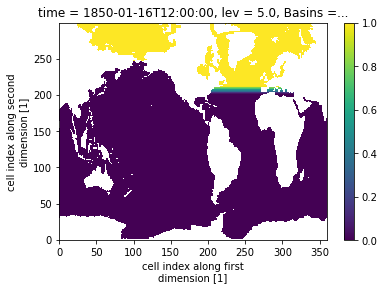

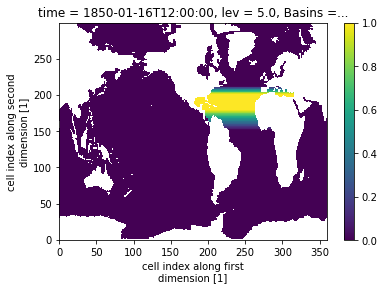

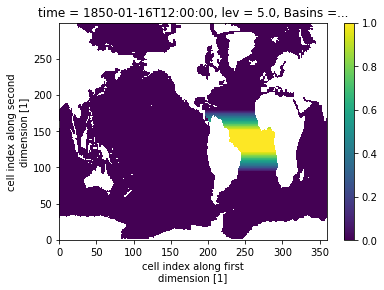

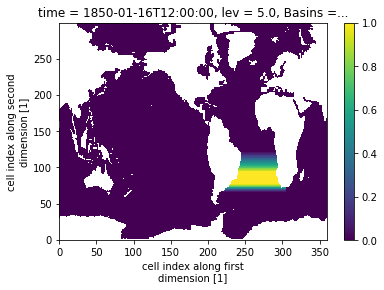

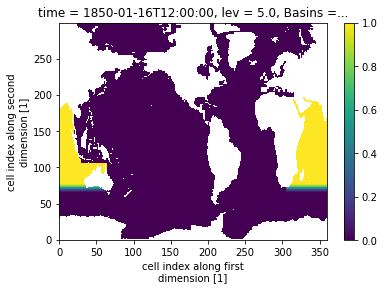

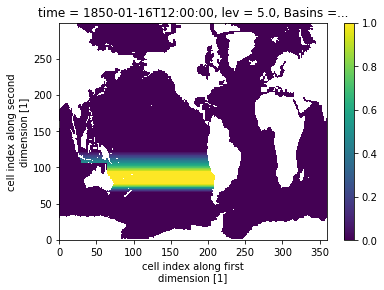

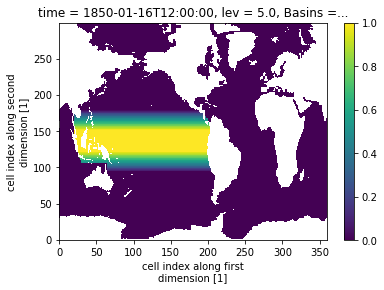

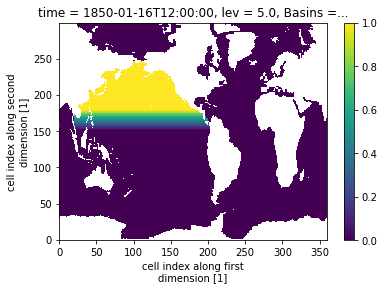

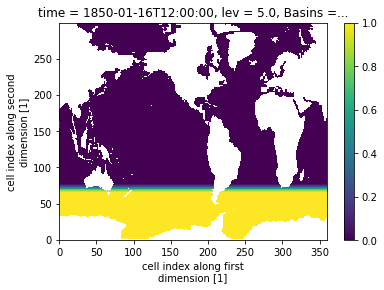